In [141]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [143]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [146]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [148]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [150]:
# reflect an existing database into a new model
hawaii_Base = automap_base()
# reflect the tables
hawaii_Base.prepare(engine, reflect=True)

In [152]:
# View all of the classes that automap found
hawaii_Base.classes.keys()

['measurement', 'station']

In [154]:
# Save references to each table
measurement = hawaii_Base.classes.measurement
station = hawaii_Base.classes.station

In [156]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [159]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).scalar()

most_recent_date

The most recent date in the dataset is: 2017-08-23


'2017-08-23'

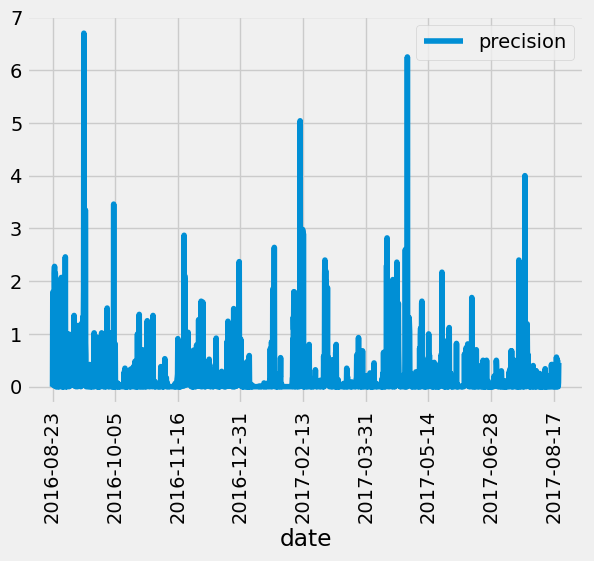

In [161]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
date_object = datetime.strptime(most_recent_date, "%Y-%m-%d")
previousYear = date_object - dt.timedelta(days = 366)

# Perform a query to retrieve the data and precipitation scores
result = session.query(measurement.date, measurement.prcp).filter(measurement.date>=previousYear).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitationDataDF = pd.DataFrame(result, columns = ["date", "precision"]).sort_values("date",ascending=True).dropna()

precipitationDataDF.set_index(precipitationDataDF["date"], inplace = True)
# Sort the dataframe by date
precipitationDataDF.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitationDataDF.plot(rot = 90)
plt.show()

In [163]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitationDataDF.describe()

,precision
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [139]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [191]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stationResults = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
stationResults

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [193]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == stationResults[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

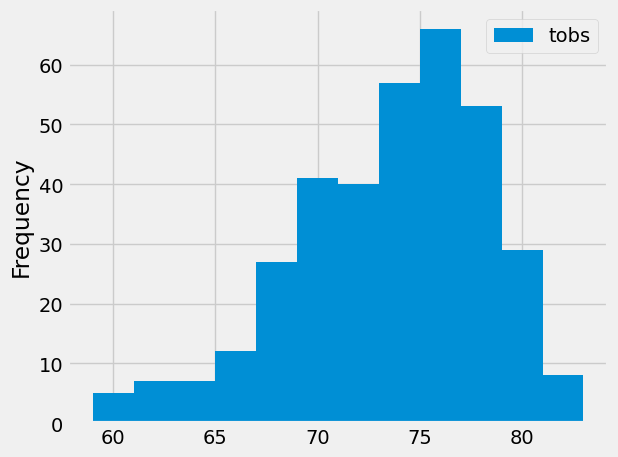

In [195]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(measurement.tobs).filter(measurement.station == stationResults[0][0]).\
    filter(measurement.date >= previousYear).all()
tempDataDF = pd.DataFrame(result, columns = ["tobs"])
tempDataDF.plot.hist(bins = 12)
plt.tight_layout()

# Close Session

In [198]:
# Close Session
session.close()